<a href="https://colab.research.google.com/github/bhavana2101/CaloriesBurntPrediction/blob/main/CaloriesBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTERNSHIP PROJECT
TITLE : CALORIES BURNT PREDICTION

The aim of the project is to predict the calories burnt by a person during his physical activity or exercise.

XGBoost Reggressor, a regression based machine learning model is used for this purpose. Parameters such as heart beat rate, duration of the physical activity, the persons height, weight, temperature are used by the model to predict the calories burnt.

IMPORTING THE DEPENDENCIES

In [1]:
! pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import gradio as gr

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

Loading the datasets

In [5]:
# Loading the calories dataset into a pandas dataframe
calories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/calories.csv')

In [6]:
# Printing the first five rows of calories dataset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
# Loading exercise dataset into pandas dataframe
exercise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exercise.csv')

In [8]:
# Printing the first five rows of exercise dataset
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
# Combining the two datasets
calories_data = pd.concat([exercise,calories['Calories']],axis=1)

In [10]:
# Printing the first five rows of the new dataset
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# Getting basic information about the dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


This gives the data regarding the number of entries, number of Non-Null alues, number of columns, data type of each column of a given dataset.

In [12]:
# Checking missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There are no missing values and so the data need not be treated.

DATA ANALYSIS

In [13]:
# Getting statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


DATA VISUALIZATION

In [14]:
sns.set_theme()

<Axes: xlabel='Gender', ylabel='count'>

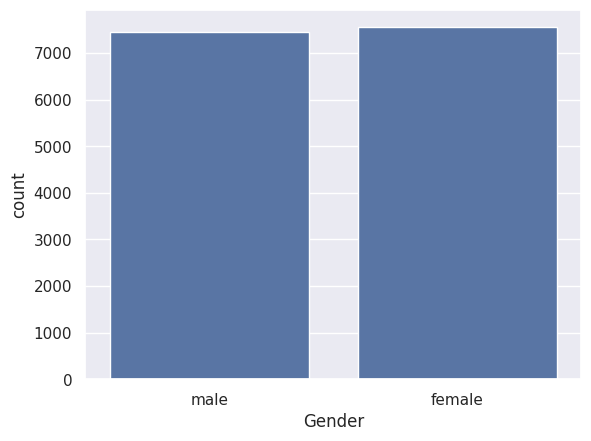

In [15]:
sns.countplot(data=calories_data,x='Gender')

INFERENCE: The number of males and females in the given dataset is almost equal and is well distributed in case of label gender.

<ipython-input-16-4b35a25245fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

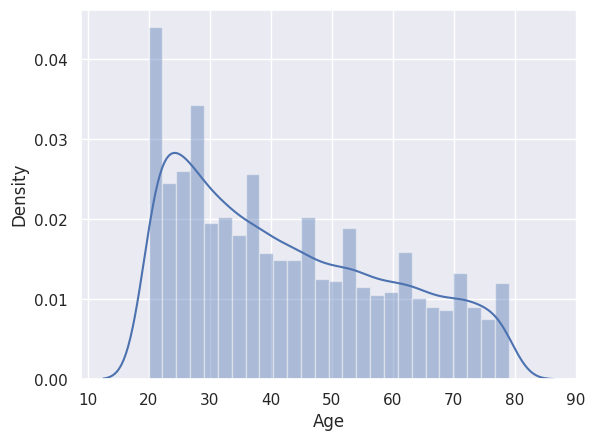

In [16]:
# Finding the distribution of Age column
sns.distplot(calories_data['Age'])

Inference : The people between the age group of 20 - 30 are more likely to workout.

<ipython-input-17-b4d2a247b58e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

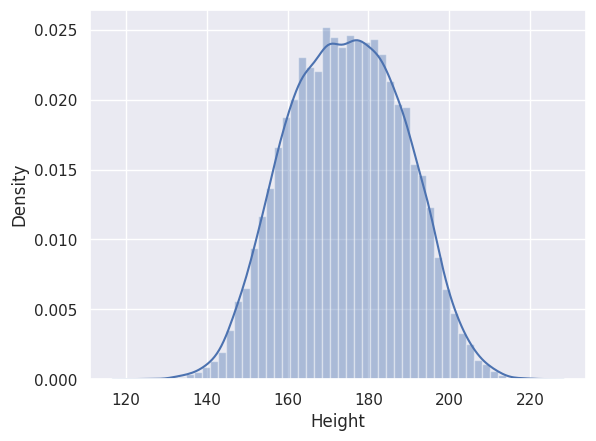

In [17]:
# Finding the distribution of Height column
sns.distplot(calories_data['Height'])

Inference : The data of Height column in the given dataset is normally distributed.

In [18]:
# Finding the correlation
correlation = calories_data.corr()

<ipython-input-18-f0fde331c5a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: >

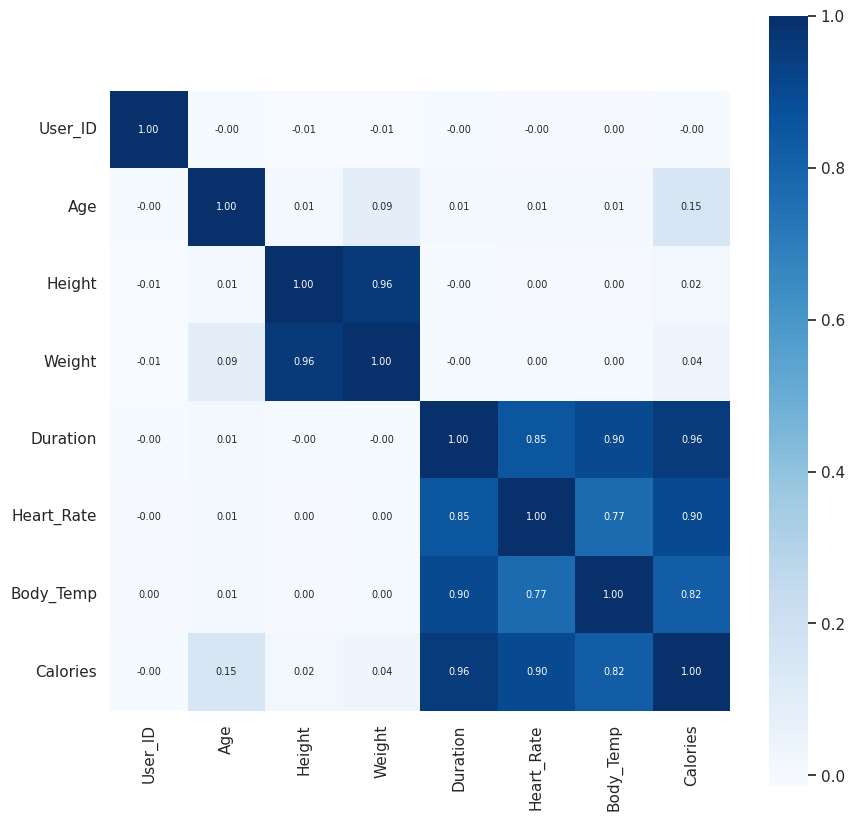

In [19]:
# Generating a heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, square=True, cbar=True, annot_kws={'size':7}, fmt='.2f',cmap='Blues')

Inference : The calories column is positively correlated with a high correlation value with columns Duration, Heart_Rate, Body_Temp. This is because when exercise is performed, energy is required and this demands higher supply of oxygen which inturn increases the heart rate. Part of the energy is used for exercise and remaining is generated as heat and thus body temparature also increases.

DATA PREPROCESSING

In [20]:
# Converting text data into numerical data
calories_data.replace({'Gender':{'male':1,'female':0}},inplace=True)

In [21]:
# Printing the first five rows of the dataset
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Female is assigned value 0 and Male is assigned value 1

In [22]:
# Seperating featues and target variable
x = calories_data.drop(columns=['User_ID','Calories'],axis=1)

In [23]:
y = calories_data.Calories

In [24]:
# Splitting the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=3, test_size=0.2)

In [25]:
# Printing the number of rows and columns in training and testing data
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


MODEL TRAINING

In [26]:
# Loading the model
model = XGBRegressor()

In [27]:
# Training the model using x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


MODEL EVALUATION

In [28]:
predicted_data = model.predict(x_test)

In [29]:
print("The Calories burnt are : ",predicted_data)

The Calories burnt are :  [179.45627  101.687386  55.761494 ...  56.196636  21.035307  99.77752 ]


In [30]:
# Finding the difference between the actual value and predicted value
error = metrics.mean_absolute_error(predicted_data,y_test)

In [31]:
print(error)

1.5176147514482339


The value of error is very low which tells that the machine learning model is working very well.

PREDICTIVE SYSTEM

In [32]:
input = (1,50,160,58,50,100,50)
# Changing the input into array format
input_array = np.asarray(input)
# Reshaping the numpy array
reshaped_array = input_array.reshape(1,-1)
# Predicting the outcome of the model
prediction = model.predict(reshaped_array)

In [33]:
print(prediction)

[179.8943]


USER INTERFACE

In [34]:
def calories_burnt(gender,age,height,weight,duration,heart_rate,body_temparature):
  input = [gender,age,height,weight,duration,heart_rate,body_temparature]
  input_array = np.asarray(input)
  reshaped_array = input_array.reshape(1,-1)
  return model.predict(reshaped_array)

In [35]:
print(calories_burnt(1,20,151,45,30,90,40))

[118.3228]


In [36]:
interface = gr.Interface(fn = calories_burnt,
                         inputs = ['number','number','number','number','number','number','number'] ,
                         outputs='number')

In [37]:
interface.launch();

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ff01c2f5c3c8b042b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


XG BOOST REGRESSION ALGORITHM VS OTHER REGRESSION ALGORITHMS

Comparing the regression algorithms to check for the better one.

In [38]:
#importing the dependencies
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Predicting calories burnt using Linear Regression

In [39]:
#loading regressor
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [40]:
#training the model
linear_regression.fit(x_train,y_train)

LinearRegression()

In [41]:
output = linear_regression.predict(x_test)
print(output)

[171.98083701 112.38599944  68.24932583 ...  56.57097647   8.31658322
 105.85301084]


In [42]:
#Finding mean absolute error
linear_error = metrics.mean_absolute_error(output,y_test)

In [43]:
print(linear_error)

8.656592460973917


Predicting calories burnt using Support Vector Regressor

In [44]:
#loading model
from sklearn.svm import SVR
svr = SVR()

In [45]:
#training the model
svr.fit(x_train,y_train)

SVR()

In [46]:
svr_output = svr.predict(x_test)

In [47]:
print(svr_output)

[159.66458165 102.84827712  81.75037022 ...  70.85885253  13.49643949
  98.99590042]


In [48]:
# Mean absolute error
svr_error = metrics.mean_absolute_error(svr_output,y_test)

In [49]:
print(svr_error)

10.675749975501041


Predicting calories burnt using Decision Tree Regressor

In [50]:
decision_tree = DecisionTreeRegressor()

In [51]:
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
decision_tree_output = decision_tree.predict(x_test)

In [53]:
print(decision_tree_output)

[178. 102.  68. ...  57.  21. 113.]


In [54]:
decision_tree_error = metrics.mean_absolute_error(decision_tree_output,y_test)

In [55]:
print(decision_tree_error)

3.4836666666666667


**INFERENCE : Among the various regression algorithms, XG Boost regression model is best to predict the calories burnt.**